In [2]:
import importlib
import components.TLQAEvaluation

# Reload the module
importlib.reload(components.TLQAEvaluation)

# Now you can use TLQAEvaluation with the latest changes
from components.TLQAEvaluation import *
import os

C:\Users\andrei\.virtualenvs\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
TLQAEvaluation = TLQAEvaluation("./../data/test_TLQA.json")

In [4]:
# Path to the results folder
folder_path = '.\\..\\results'

# List of all metrics
metrics = {
    "rouge": TLQAEvaluation.rouge_scores,
    "bleu": TLQAEvaluation.bleu_score,
    "f1": TLQAEvaluation.f1_score,
    "exact_match": TLQAEvaluation.exact_match,
    "completeness": TLQAEvaluation.completeness,
    "temporal_alignment": TLQAEvaluation.temporal_alignment,
    "temporal_ordering": TLQAEvaluation.temporal_ordering,
}

# Prepare a list to collect all results for saving to CSV
all_results = []

for file_name in os.listdir(folder_path):
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)

    # Process all .csv files
    if os.path.isfile(file_path) and file_name.endswith('.csv'):
        print(f"Processing file: {file_path}")

        try:
            actual = TLQAEvaluation.read_csv_output(file_path)
        except UnicodeDecodeError as e:
            print(f"Error processing file: {file_path}")
            print(f"Error details: {e}")
            continue  # Skip the problematic file

        # Dictionary to store results for this file
        file_results = {"file_name": file_name}

        for metric_name, metric_func in metrics.items():
            try:
                result = TLQAEvaluation.evaluate(
                    predictions=actual.to_dict(orient="records"),  # Convert DataFrame to a list of dictionaries
                    metric=metric_name,
                    normalize=True
                )
                file_results[metric_name] = result
            except Exception as e:
                print(f"Error evaluating metric {metric_name} for file {file_path}: {e}")
                file_results[metric_name] = None  # Add None if evaluation fails

        # Add the results for this file to the overall list
        all_results.append(file_results)

# Convert the results to a DataFrame
results_df = pd.DataFrame(all_results)

# Save the results to a CSV file
output_csv_path = os.path.join(folder_path, "evaluation_results.csv")
results_df.to_csv(output_csv_path, index=False)

print(f"All metrics saved to {output_csv_path}")

Processing file: .\..\results\few_shot_knn_10_base_finetuned.csv
Processing file: .\..\results\few_shot_knn_10_large.csv
Processing file: .\..\results\few_shot_knn_10_large_finetuned.csv
Processing file: .\..\results\few_shot_knn_10_xl.csv
Processing file: .\..\results\few_shot_knn_3_base_finetuned.csv
Processing file: .\..\results\few_shot_knn_3_large.csv
Processing file: .\..\results\few_shot_knn_3_large_finetuned.csv
Processing file: .\..\results\few_shot_knn_3_xl.csv
Processing file: .\..\results\few_shot_knn_5_base_finetuned.csv
Processing file: .\..\results\few_shot_knn_5_large.csv
Processing file: .\..\results\few_shot_knn_5_large_finetuned.csv
Processing file: .\..\results\few_shot_knn_5_xl.csv
Error evaluating metric completeness for file .\..\results\few_shot_knn_5_xl.csv: mat1 and mat2 shapes cannot be multiplied (1x0 and 384x2)
Processing file: .\..\results\few_shot_knn_7_base_finetuned.csv
Processing file: .\..\results\few_shot_knn_7_large.csv
Processing file: .\..\results

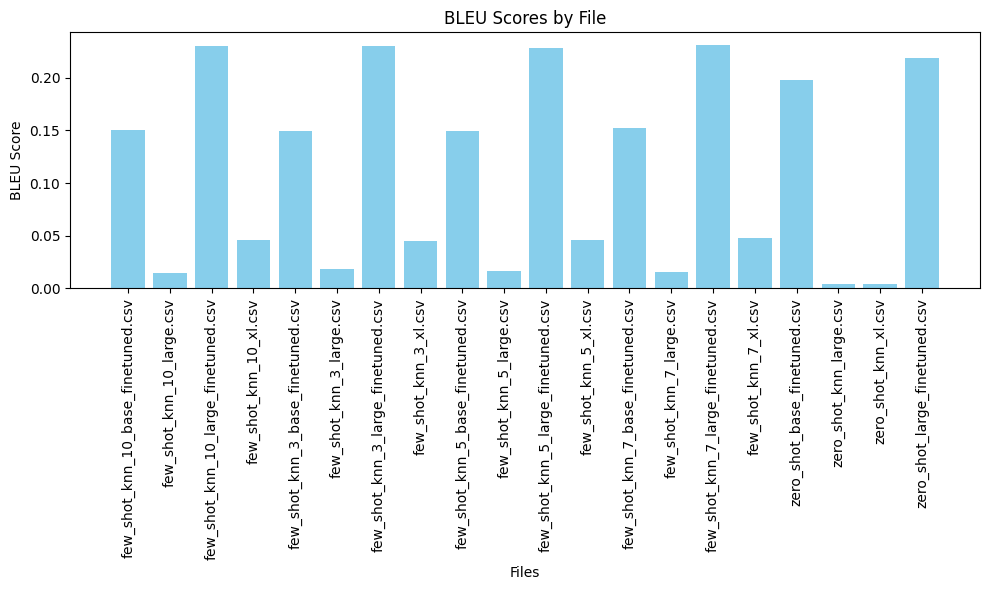

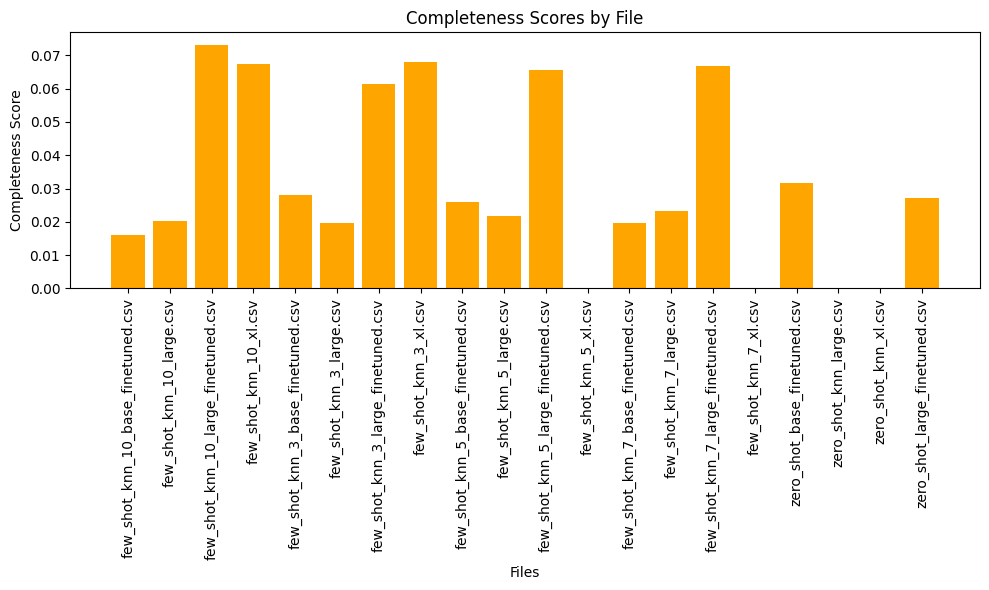

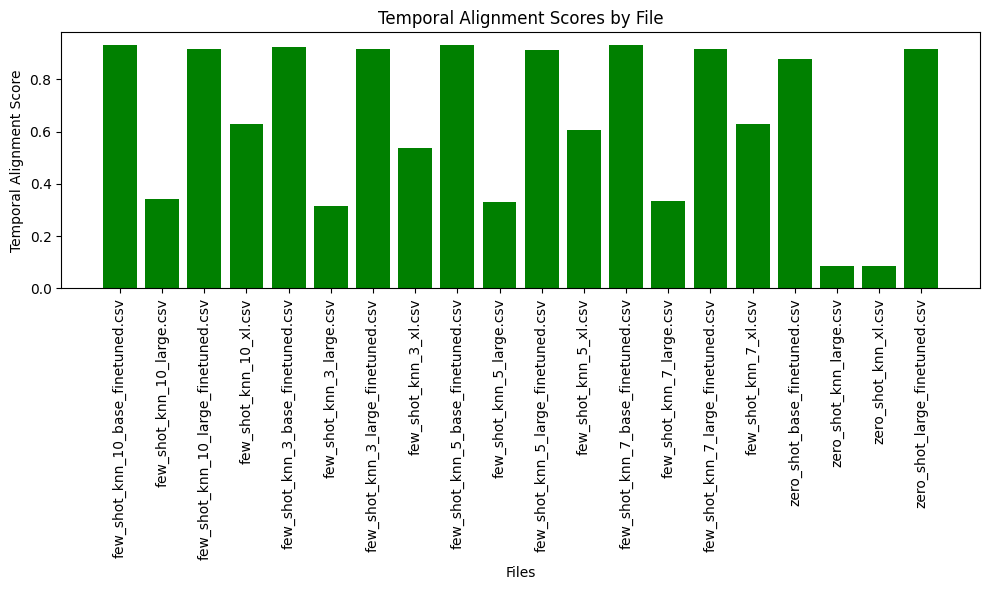

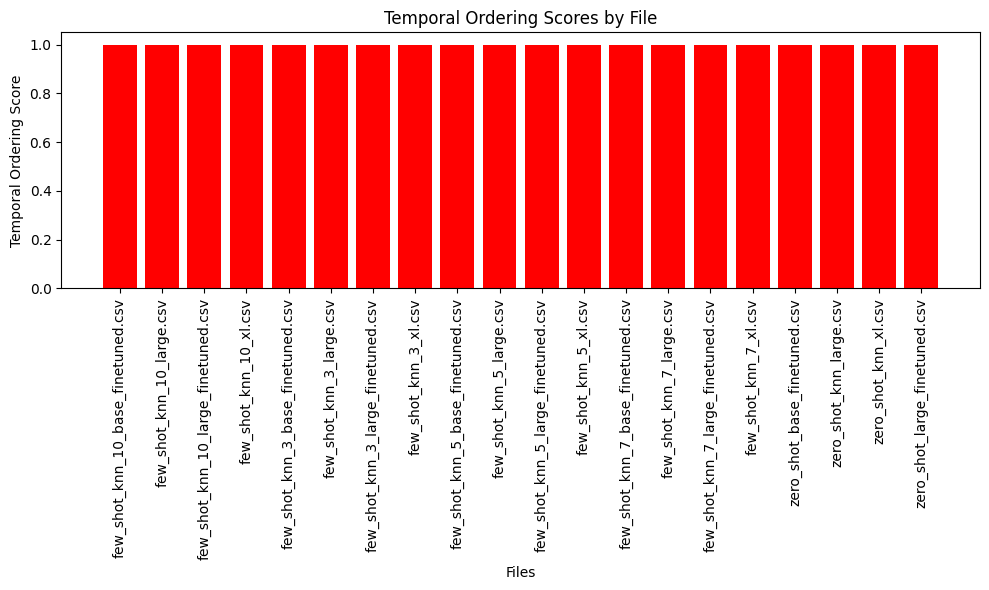

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
evaluation_results = pd.read_csv('./evaluation_results.csv')

# Clean data for plotting
numerical_metrics = ["bleu", "completeness", "temporal_alignment", "temporal_ordering"]
parsed_data = evaluation_results[numerical_metrics]

# Plot BLEU Scores
plt.figure(figsize=(10, 6))
plt.bar(evaluation_results['file_name'], evaluation_results['bleu'], color='skyblue')
plt.xticks(rotation=90)
plt.title('BLEU Scores by File')
plt.ylabel('BLEU Score')
plt.xlabel('Files')
plt.tight_layout()
plt.show()

# Plot Completeness Scores
plt.figure(figsize=(10, 6))
plt.bar(evaluation_results['file_name'], evaluation_results['completeness'], color='orange')
plt.xticks(rotation=90)
plt.title('Completeness Scores by File')
plt.ylabel('Completeness Score')
plt.xlabel('Files')
plt.tight_layout()
plt.show()

# Plot Temporal Alignment Scores
plt.figure(figsize=(10, 6))
plt.bar(evaluation_results['file_name'], evaluation_results['temporal_alignment'], color='green')
plt.xticks(rotation=90)
plt.title('Temporal Alignment Scores by File')
plt.ylabel('Temporal Alignment Score')
plt.xlabel('Files')
plt.tight_layout()
plt.show()

# Plot Temporal Ordering Scores
plt.figure(figsize=(10, 6))
plt.bar(evaluation_results['file_name'], evaluation_results['temporal_ordering'], color='red')
plt.xticks(rotation=90)
plt.title('Temporal Ordering Scores by File')
plt.ylabel('Temporal Ordering Score')
plt.xlabel('Files')
plt.tight_layout()
plt.show()
